<a href="https://colab.research.google.com/github/aizzaauliya/Praktikum-Pembelajaran-Mesin/blob/main/(versi_3)_Kegiatan_Modul_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #1**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang telah dibangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### Pengenalan tugas kegiatan 1

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

### 1. Initial process



* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

* Untuk selanjutnya pahami code dibawah dengan baik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Semester 7/ML/Kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/Semester 7/ML/Kaggle

/content/drive/MyDrive/Semester 7/ML/Kaggle


In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

kaggle.json


* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google dari kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 98% 301M/306M [00:03<00:00, 103MB/s] 
100% 306M/306M [00:03<00:00, 103MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rockpaperscissors.zip


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


Buat folder baru bernama `dataset` dan memindahkan folder `paper, rock, scissors` kedalam folder `dataset`. Selanjutnya, lakukan splitting dataset menjadi 3 bagian `train, test, val` dan simpan ketiga folder tersebut diluar folder `dataset`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
from os import mkdir

mkdir('dataset')

In [ ]:
ls

dataset/     paper/                    rock/           scissors/
kaggle.json  README_rpc-cv-images.txt  rps-cv-images/


In [ ]:
import shutil, sys

shutil.move("/content/drive/MyDrive/Semester 7/ML/Kaggle/paper", "/content/drive/MyDrive/Semester 7/ML/Kaggle/dataset") 
shutil.move("/content/drive/MyDrive/Semester 7/ML/Kaggle/rock", "/content/drive/MyDrive/Semester 7/ML/Kaggle/dataset") 
shutil.move("/content/drive/MyDrive/Semester 7/ML/Kaggle/scissors", "/content/drive/MyDrive/Semester 7/ML/Kaggle/dataset") 

'/content/drive/MyDrive/Semester 7/ML/Kaggle/dataset/scissors'

In [ ]:
%rm -rf test
%rm -rf train
%rm -rf valid

In [ ]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile

TRAIN_DIR = "/content/drive/MyDrive/Semester 7/ML/Kaggle/train/"
VALID_DIR ="/content/drive/MyDrive/Semester 7/ML/Kaggle/valid/"
TEST_DIR ="/content/drive/MyDrive/Semester 7/ML/Kaggle/test/"

os.mkdir(TRAIN_DIR)
os.mkdir(VALID_DIR)
os.mkdir(TEST_DIR)

for label in ['paper', 'rock', 'scissors']:
    os.mkdir(TRAIN_DIR+label)
    os.mkdir(VALID_DIR+label)
    os.mkdir(TEST_DIR+label)


In [ ]:
# TULIS KODE ANDA DISINI
import random

def train_valid_test_split(source, train_dir, valid_dir, test_dir,train_size, valid_size, test_size):
    # get files
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
    
    # train valid split

    train_size = int(len(files) * (1 - (valid_size + train_size)))
    valid_size = int(len(files)* (1 - (valid_size + test_size)))
    test_size = int(len(files)* (1 - train_size))
    
    # shuffle the dataset
    shuffled_files = random.sample(files, len(files))  

    train_set = shuffled_files[train_size:valid_size]
    valid_set = shuffled_files[valid_size:]
    test_set = shuffled_files[:train_size]
    
    for filename in train_set:
        filepath = source + filename
        destination = train_dir + filename
        copyfile(filepath, destination)
        
    for filename in valid_set:
        filepath = source + filename
        destination = valid_dir + filename
        copyfile(filepath, destination)
    
    for filename in test_set:
        filepath = source + filename
        destination = test_dir + filename
        copyfile(filepath, destination)

SOURCE = "/content/drive/MyDrive/Semester 7/ML/Kaggle/dataset/"

for label in ['paper', 'rock', 'scissors']:
    print(label)
    train_valid_test_split(SOURCE+label+'/', TRAIN_DIR +label+'/', VALID_DIR +label+'/', TEST_DIR +label+'/', train_size=0.8, valid_size=0.19, test_size=0.01)
    print(len(os.listdir(TRAIN_DIR +label+'/')))
    print(len(os.listdir(VALID_DIR +label+'/')))
    print(len(os.listdir(TEST_DIR +label+'/')))

paper
562
143
7
rock
573
146
7
scissors
593
150
7


### 2. Data Preprocessing

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit proses augmentasi sederhana. 

**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

Lakukan proses agumentasi sederhana pada dataset anda menggunakan `ImageDataGenerator` dengan ketentuan melakukan proses seperti berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 90,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2
)

test_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.7
)

In [ ]:
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)
val_images = test_generator.flow_from_directory(
    VALID_DIR,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
    subset = 'training'
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
    subset = 'validation'
)

Found 1728 images belonging to 3 classes.
Found 132 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


### 3. Definisikan Model CNN

Bangun model CNN dan lakukan evaluasi sesuai kriteria **WAJIB** berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix
* Pastikan nilai akurasi model > 80%
* Mendefinisikan minimal 100 epoch untuk masing-masing model
* Melakukan prediksi minimal 15 gambar acak yang dapat mewakili seluruh kelas
* Menampilkan input gambar yang di prediksi beserta label hasil prediksi, nilai akurasi prediksi, dan lama waktu prediksi dalam sebuah plot. (15 gambar ditampilkan dalam 1 plot)
* Save model dalam file `json` dan simpan bobot dalam file `HDF5`
* Pastikan model anda dapat memprediksi unseen data dengan benar.

In [ ]:
# TULIS KODE ANDA DISINI
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow as tf

inputs = tf.keras.Input(shape = (150, 150, 3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalMaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)


model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=40,
            verbose=1, 
            mode='auto',
            cooldown=1
        )
    ]
)

Epoch 1/100
54/54 [==============================] - 20s 338ms/step - loss: 0.9242 - accuracy: 0.5521 - val_loss: 0.9768 - val_accuracy: 0.3939
Epoch 2/100
54/54 [==============================] - 18s 329ms/step - loss: 0.6633 - accuracy: 0.7031 - val_loss: 0.9773 - val_accuracy: 0.5000
Epoch 3/100
54/54 [==============================] - 18s 324ms/step - loss: 0.5802 - accuracy: 0.7541 - val_loss: 0.8723 - val_accuracy: 0.4242
Epoch 4/100
54/54 [==============================] - 18s 326ms/step - loss: 0.4595 - accuracy: 0.8235 - val_loss: 0.6068 - val_accuracy: 0.7045
Epoch 5/100
54/54 [==============================] - 18s 325ms/step - loss: 0.3643 - accuracy: 0.8727 - val_loss: 0.4089 - val_accuracy: 0.9242
Epoch 6/100
54/54 [==============================] - 18s 325ms/step - loss: 0.2975 - accuracy: 0.8889 - val_loss: 0.2419 - val_accuracy: 0.9697
Epoch 7/100
54/54 [==============================] - 18s 325ms/step - loss: 0.3158 - accuracy: 0.8906 - val_loss: 0.2084 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

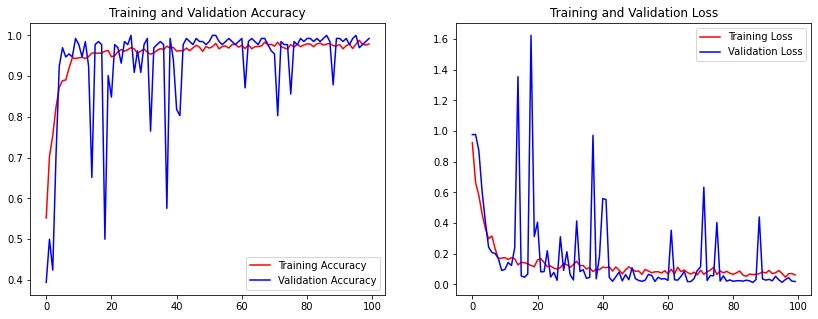

In [ ]:
eval_plot(history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate(model):

  valid_generator = train_generator.flow_from_directory(
          TRAIN_DIR, 
          target_size=(150,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False)

  batch_size = 32
  num_of_test_samples = len(valid_generator.filenames)

  Y_pred = model.predict_generator(valid_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
  plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Rock', 'Paper', 'Scissors']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Found 1728 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix



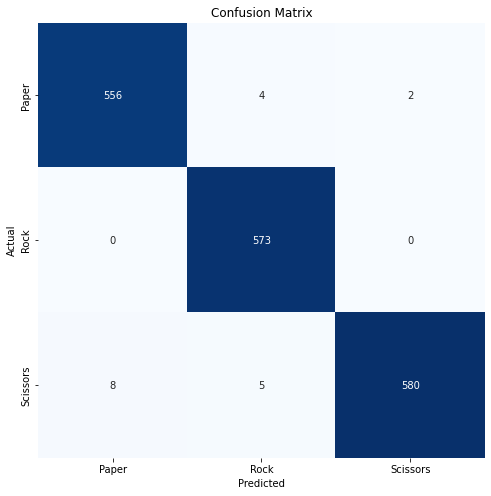



Classification Report

              precision    recall  f1-score   support

        Rock       0.99      0.99      0.99       562
       Paper       0.98      1.00      0.99       573
    Scissors       1.00      0.98      0.99       593

    accuracy                           0.99      1728
   macro avg       0.99      0.99      0.99      1728
weighted avg       0.99      0.99      0.99      1728



In [ ]:
evaluate(model)

In [ ]:
import PIL

def predictModel(image_path):
    img = PIL.Image.open(image_path)
    img_resized = img.resize((150, 150), PIL.Image.LANCZOS)
    plt.imshow(img_resized)
    plt.axis('off')
    plt.title("First")
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    predik = model.predict(img_array)

    labels = np.argmax(predik, axis=1)
    if labels == 0 :
      plt.title(f"Pred : {predik}\nLabels : {labels}kertas")
    elif labels == 1 :
      plt.title(f"Pred : {predik}\nLabels : {labels}batu")
    elif labels == 2 :
      plt.title(f"Pred : {predik}\nLabels : {labels}gunting")


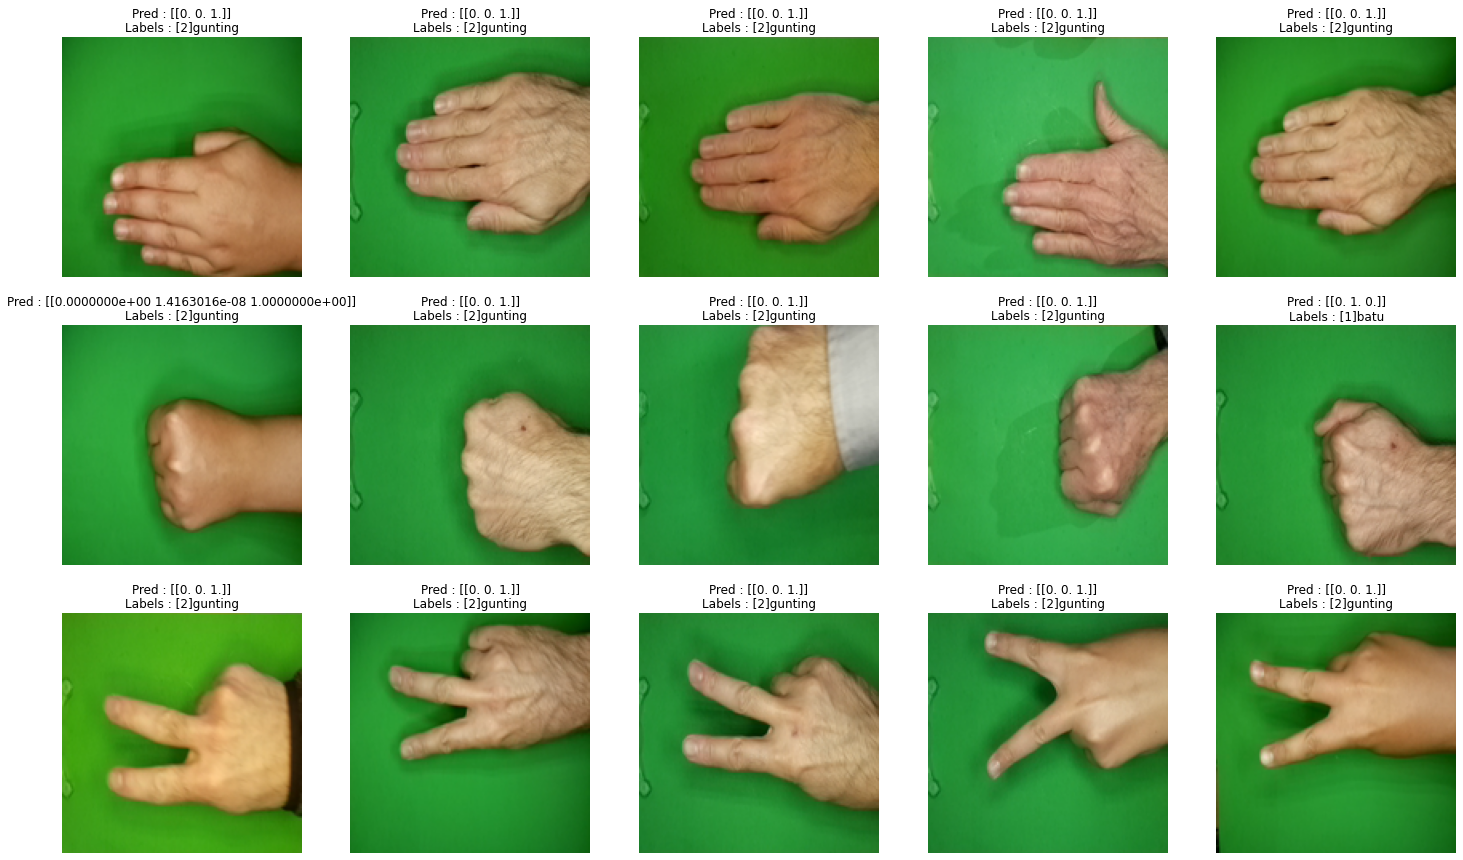

In [ ]:
import cv2
from matplotlib import pyplot as plt
  
fig = plt.figure(figsize=(25, 15))
  
rows = 3
columns = 5
  
fig.add_subplot(rows, columns, 1)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/paper/7w91NsCtVzsPOSYB.png")
fig.add_subplot(rows, columns, 2)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/paper/FcIIjteQItMuIuRa.png")
fig.add_subplot(rows, columns, 3)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/paper/TstngIvuLJt0GIze.png")
fig.add_subplot(rows, columns, 4)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/paper/Wcg4nsnlWrhxgyJg.png")
fig.add_subplot(rows, columns, 5)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/paper/owYHB2dx7ExdKxsR.png")

fig.add_subplot(rows, columns, 6)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/rock/5QHZzfwp2xJXckQb.png")
fig.add_subplot(rows, columns, 7)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/rock/8zsAtTLXniXCu2Jx.png")
fig.add_subplot(rows, columns, 8)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/rock/KC8RPAtZSyUL0vaR.png")
fig.add_subplot(rows, columns, 9)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/rock/RpCSMPJ0LhFPYksZ.png")
fig.add_subplot(rows, columns, 10)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/rock/how0vUOltuU1m495.png")

fig.add_subplot(rows, columns, 11)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/scissors/GfBCXN6UyOkkwshw.png")
fig.add_subplot(rows, columns, 12)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/scissors/LHW5Ms4SEAGtveh5.png")
fig.add_subplot(rows, columns, 13)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/scissors/YqEvBlhrl5XkzIlO.png")
fig.add_subplot(rows, columns, 14)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/scissors/e8p8cRK4gABNoiaZ.png")
fig.add_subplot(rows, columns, 15)
predictModel("/content/drive/MyDrive/Semester 7/ML/Kaggle/test/scissors/qHXkVDE4py7UfvIQ.png")


  

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

